# PARTE A: Transformacion de datos

 Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

   Detección y eliminación de Outliers

   Encoding

   Imputación de valores faltantes
   
   Escalado de datos

   Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

##### Checklist:
Debes implementar al menos tres de las transformaciones de datos propuestas.

Debes justificar por qué creés que las transformaciones elegidas aplican en este dataset.
Debes re entrenar un modelo del Proyecto 01 y comparar su desempeño con el modelo obtenido en el Proyecto 01.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
import warnings
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df.shape

(146660, 19)

In [3]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


### Elimino duplicados


Detecte cuando realize nuevamente el analisis del dataset que habia instancias duplicadas, con exactamente la misma descripcion y decidi eliminarlas ya que esto podria sesgar mi modelo, aunque, el porcentaje de estas es minimo.

In [4]:
len(df)-len(df.drop_duplicates())

2358

In [5]:
df = df.drop_duplicates()
df.shape

(144302, 19)

### Filtrado del dataset

Basado el analisis del primer proyecto, decidi volver a trabajar con el filtro de las principales caracteristicas con el mayor porcentaje de datos. O sea Casa, Departamento, Ph ubicados en Capital Federal, pero esta vez a la transformacion no la voy a hacer directa como en el anterior proyecto sino que voy a utilizar las herrammientas aprendidas para eliminar o imputar los datos que crea necesario

In [6]:
df = df.loc[df['l2'] == 'Capital Federal']
prop_type = ['Departamento','Casa', 'PH']
df = df.loc[df['property_type'].isin(prop_type)]

Voy a eliminar las columnas que me son irrelevantes ante el analisis, con el fin de tener un dataset mas limpio y con menos cantidad de datos para el procesamiento

In [7]:
df = df.drop(['lat', 'lon', 'start_date', 'end_date', 'currency', 'l1', 'l2', 'created_on', 'operation_type'], axis=1)

Por lo tanto solo quedaran las siguientes

In [8]:
df.columns

Index(['l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'title', 'description', 'property_type'],
      dtype='object')

In [9]:
df.shape

(89874, 10)

In [10]:
df.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH


### Eliminacion de oitliers

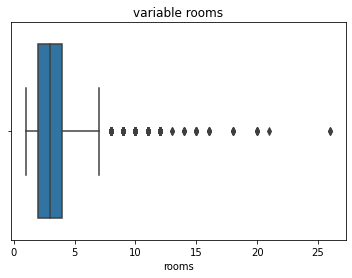

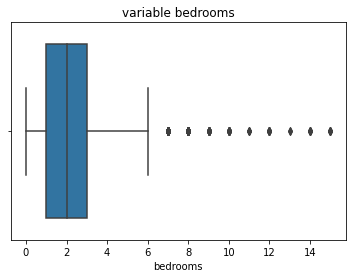

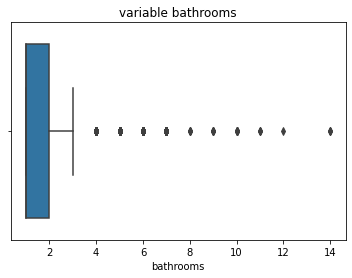

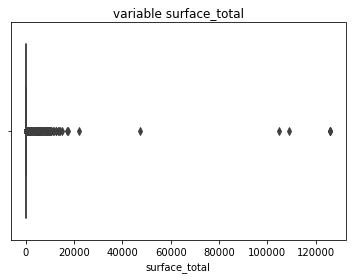

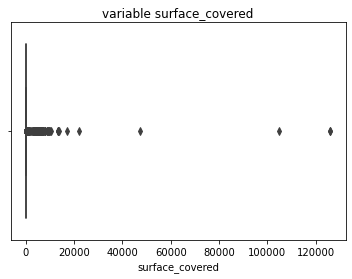

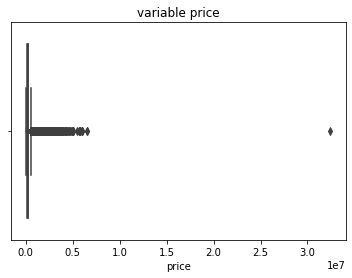

In [11]:
columnas = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
for col in columnas:
    sns.boxplot(df[col])
    plt.title('variable ' + col)
    plt.show()

Como sabiamos, las variables a utilizar tenias valores atipicos los cuales eliminaremos a traves del metodo IQR y quedaran de la siguiente manera:

In [12]:
def IQR_outliers(df,column, ancho_bigote= 1.5):
    Q1 = np.nanpercentile(df[column],25)
    Q3 = np.nanpercentile(df[column],75)
    IQR = Q3-Q1
    df = df[~ ((df[column] < (Q1 - ancho_bigote * IQR))|
          (df[column] > (Q3 + ancho_bigote * IQR)))]
    return df       

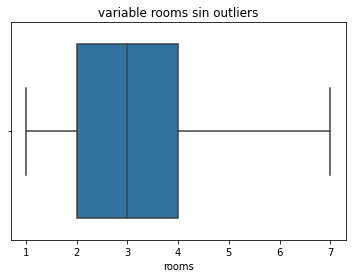

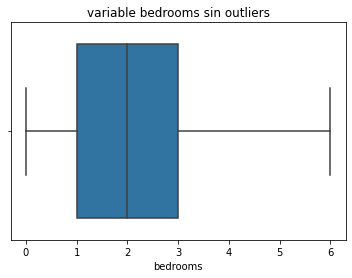

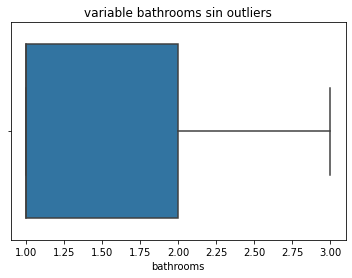

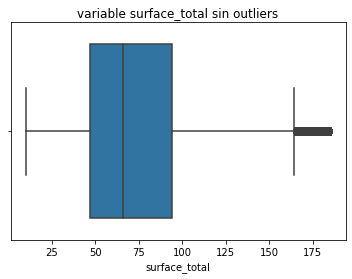

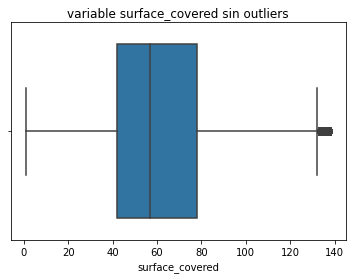

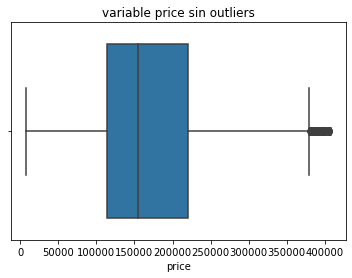

In [13]:
for col in columnas:
    df = IQR_outliers(df, col, ancho_bigote=1.5)
    sns.boxplot(df[col])
    plt.title('variable ' + col + ' sin outliers')
    plt.show()

### Tratamiento de datos faltantes

In [14]:
print ('Datos faltantes en valores absolutos ')
print(df.isna().sum())
print ('Datos faltantes en porcentajes sobre el total')
(df.isna().sum()/len(df))*100

Datos faltantes en valores absolutos 
l3                    0
rooms                 0
bedrooms              0
bathrooms          1939
surface_total      7865
surface_covered    8134
price                 0
title                 0
description           0
property_type         0
dtype: int64
Datos faltantes en porcentajes sobre el total


l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           2.615040
surface_total      10.607164
surface_covered    10.969952
price               0.000000
title               0.000000
description         0.000000
property_type       0.000000
dtype: float64

In [15]:
df.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.937477,0.489290,0.735827,0.798791,0.586277
bedrooms,0.937477,1.000000,0.487682,0.718713,0.787354,0.566090
bathrooms,0.489290,0.487682,1.000000,0.538380,0.576886,0.573917
surface_total,0.735827,0.718713,0.538380,1.000000,0.901807,0.710590
surface_covered,0.798791,0.787354,0.576886,0.901807,1.000000,0.730850
price,0.586277,0.566090,0.573917,0.710590,0.730850,1.000000


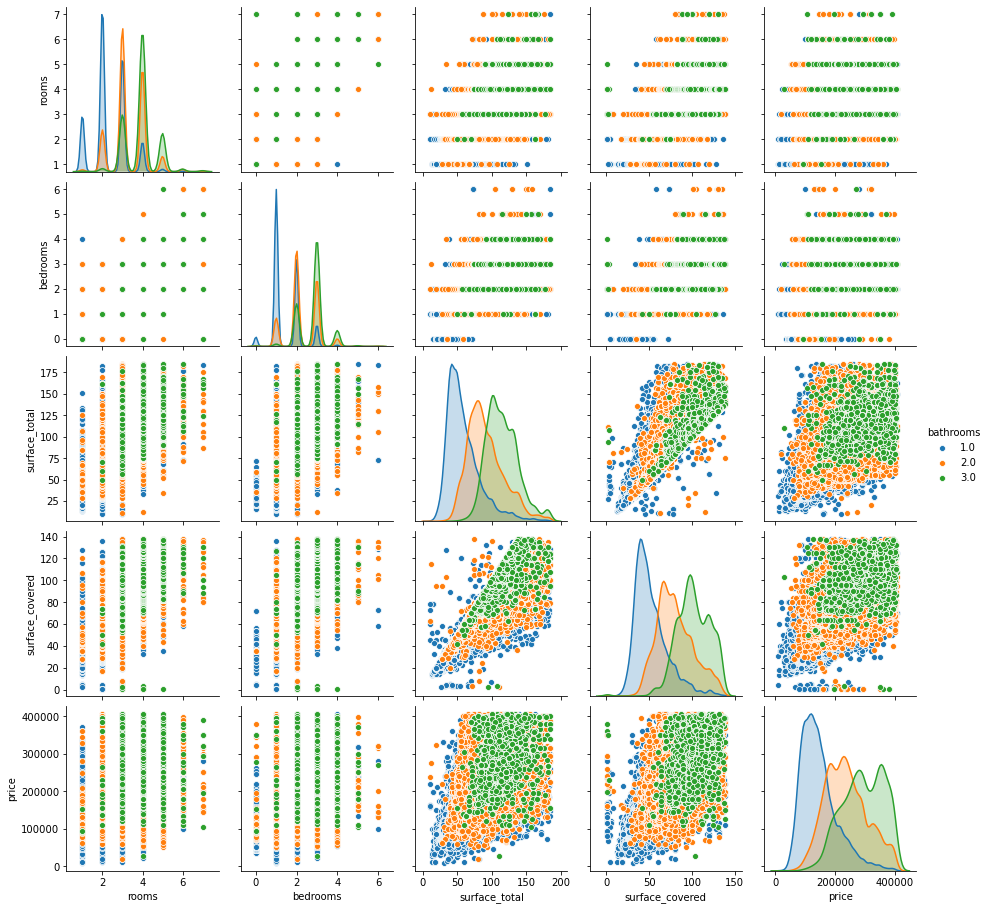

In [16]:
sns.pairplot(df, hue = 'bathrooms')

Por la correlacion que se ve en los datos de las variables baños con  superficie total y cubierta y precio, y a su vez estas dos primeras tener tambien ausencia de datos, aplicare un knn imputer para que prediga todas las instancias faltantes de una sola vez, haciendo la relacion que corresponde.

In [17]:
dfaux = df.copy()
dfaux = dfaux.iloc[:,[3,4,5,6]]
dfaux = dfaux.dropna(axis=0)
dfaux.head()

,bathrooms,surface_total,surface_covered,price
1,2.0,70.0,58.0,159000.0
2,1.0,45.0,45.0,125000.0
3,1.0,85.0,50.0,295000.0
5,1.0,56.0,56.0,150000.0
6,1.0,70.0,70.0,159500.0


In [18]:
X = dfaux.drop("surface_covered", axis=1)
y = dfaux.surface_covered

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsRegressor()

#voy a hacer un grid search para ver cual es el numero de vecinos a utilizar
param_grid = {'n_neighbors':np.arange(1,20)}

model = GridSearchCV(knn, param_grid = param_grid, cv = 5)


model.fit(X_train,y_train)
model.best_estimator_
print('Numero de vecinos a usar: ', model.best_estimator_.n_neighbors)

Numero de vecinos a usar:  6


In [19]:
# ahora si aplicar el knn imputer

X = df.iloc[:,[3,4,5,6]] #Son las variables con datos faltantes y precio

imputer = KNNImputer(n_neighbors = 6)

df_lleno = imputer.fit_transform(X)

In [20]:
#Le damos formato al nuevo dataset
df_lleno = pd.DataFrame(df_lleno, columns =['bathrooms', 'surface_total', 'surface_covered', 'price'])
df_lleno['bathrooms'] = round (df_lleno ['bathrooms'],0)

In [21]:
df_lleno.isna().sum()

bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

Partiendo desde el dataset creado anteriormente (df_lleno) con todas las instancias faltantes, ahora hay que reemplazarlas en el dataset original.

In [22]:
df = df.reset_index(drop=True)

df.drop(['bathrooms', 'surface_total', 'surface_covered'],axis=1, inplace=True)

df ['bathrooms'] = df_lleno ['bathrooms']
df ['surface_total'] = df_lleno ['surface_total']
df ['surface_covered'] = df_lleno ['surface_covered']

df.isna().sum()

l3                 0
rooms              0
bedrooms           0
price              0
title              0
description        0
property_type      0
bathrooms          0
surface_total      0
surface_covered    0
dtype: int64

Por decision personal, ya que no me parece tratar las variables que tengan una deficiencia como la siguiente (superficie cubierta > superficie total) porque no podemos saber cual es el error que hubo y no tenemos la certeza de que si igualamos ambas eso se asimile a la realidad, voy a descartar estas instancias. Tambien para seguir con el criterio del proyecto anterior.

In [23]:
df.shape

(74148, 10)

In [24]:
df = df.drop(df[df['surface_covered']>df['surface_total']].index)
df.shape

(72350, 10)

### Encoding

In [25]:
df_encoded = df.copy()

In [26]:
tipo_de_prop = pd.get_dummies(df_encoded.property_type)
df_encoded = pd.concat([df_encoded, tipo_de_prop], axis=1)
df_encoded.head()

,l3,rooms,bedrooms,price,title,description,property_type,bathrooms,surface_total,surface_covered,Casa,Departamento,PH
0,Boedo,2.0,1.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,2.0,70.0,58.0,0,0,1
1,Palermo,2.0,1.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,1.0,45.0,45.0,0,0,1
2,Palermo,2.0,1.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,1.0,85.0,50.0,0,0,1
3,Villa Crespo,2.0,1.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,1.0,56.0,56.0,0,0,1
4,Villa Crespo,2.0,1.0,159500.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,1.0,70.0,70.0,0,0,1


In [27]:
barrio = pd.get_dummies(df_encoded.l3)
df_encoded = pd.concat([df_encoded, barrio], axis=1)
df_encoded.head()

,l3,rooms,bedrooms,price,title,description,property_type,bathrooms,surface_total,surface_covered,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,Boedo,2.0,1.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,2.0,70.0,58.0,...,0,0,0,0,0,0,0,0,0,0
1,Palermo,2.0,1.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,1.0,45.0,45.0,...,0,0,0,0,0,0,0,0,0,0
2,Palermo,2.0,1.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,1.0,85.0,50.0,...,0,0,0,0,0,0,0,0,0,0
3,Villa Crespo,2.0,1.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,1.0,56.0,56.0,...,0,0,0,0,0,0,0,0,0,0
4,Villa Crespo,2.0,1.0,159500.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,1.0,70.0,70.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72350 entries, 0 to 74147
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   l3                    72350 non-null  object 
 1   rooms                 72350 non-null  float64
 2   bedrooms              72350 non-null  float64
 3   price                 72350 non-null  float64
 4   title                 72350 non-null  object 
 5   description           72350 non-null  object 
 6   property_type         72350 non-null  object 
 7   bathrooms             72350 non-null  float64
 8   surface_total         72350 non-null  float64
 9   surface_covered       72350 non-null  float64
 10  Casa                  72350 non-null  uint8  
 11  Departamento          72350 non-null  uint8  
 12  PH                    72350 non-null  uint8  
 13  Abasto                72350 non-null  uint8  
 14  Agronomía             72350 non-null  uint8  
 15  Almagro            

### Comparacion con el modelo del primer proyecto

En el proyecto numero 1 los resultados del error fueron los siguentes: 

El rmse del train fue:  95844.93

El rmse del test fue:  98510.84

In [29]:
df1 = df.copy() #voy a dejar solo mis variables de interes
df1 = df1[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
df1.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,2.0,1.0,2.0,70.0,58.0,159000.0
1,2.0,1.0,1.0,45.0,45.0,125000.0
2,2.0,1.0,1.0,85.0,50.0,295000.0
3,2.0,1.0,1.0,56.0,56.0,150000.0
4,2.0,1.0,1.0,70.0,70.0,159500.0


In [30]:
X = df1.drop("price", axis=1)
y = df1.price

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
tree_regressor = DecisionTreeRegressor(max_depth=13)

In [33]:
tree_regressor.fit(X, y)

DecisionTreeRegressor(max_depth=13)

In [34]:
y_train_predict = tree_regressor.predict(X_train)
y_test_predict = tree_regressor.predict(X_test)

In [35]:
rmse_train_tree_all = np.sqrt(mean_squared_error(y_train, y_train_predict))
rmse_test_tree_all = np.sqrt(mean_squared_error(y_test, y_test_predict))

print('El rmse del train es: ', rmse_train_tree_all)
print('El rmse del test es: ', rmse_test_tree_all)

El rmse del train es:  39757.83195223173
El rmse del test es:  39651.32540747668


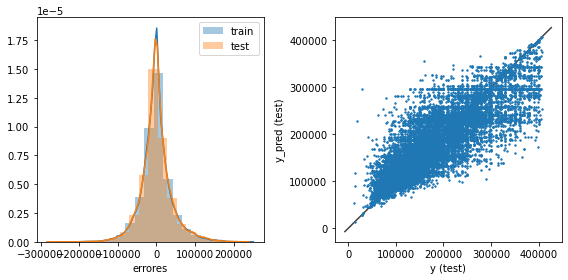

In [36]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_predict, bins = 20, label = 'train')
sns.distplot(y_test - y_test_predict, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_predict, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [37]:
resultados_dic = {'Modelo': ['Modelo 1','Modelo 1','Modelo 2','Modelo 2'],
                  'Error':['95844.93', '98510.84', rmse_train_tree_all, rmse_test_tree_all],
                  'Datos': ['train', 'test', 'train', 'test']
                 } 

Resultados = pd.DataFrame(resultados_dic)
Resultados

,Modelo,Error,Datos
0,Modelo 1,95844.93,train
1,Modelo 1,98510.84,test
2,Modelo 2,39757.8,train
3,Modelo 2,39651.3,test


Podemos observar numericamente como se redujo el error pasando de 95844.93 a 39765.5 en el train y de 98510.84 a 39654.5 en el test, bajando tambien el overfiting

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

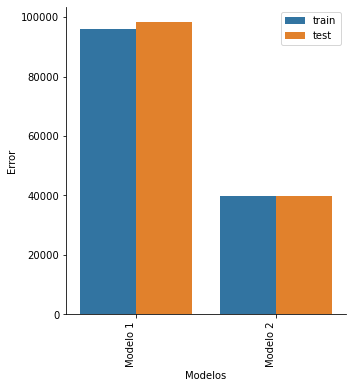

In [38]:
sns.catplot(x = 'Modelo', y = 'Error', hue = 'Datos', kind = 'bar', data = Resultados, legend = False)
plt.xlabel('Modelos')
plt.ylabel('Error')
plt.legend(loc='upper right')
plt.xticks(rotation=90, horizontalalignment='right')

Aqui podemos observar como el error se reduce a mas de la mitad con el nuevo dataset

# PARTE B: Modelos avanzados

Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

#### Checklist:
En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.

## Regresion lineal con atributos polinomicos

In [39]:
df_reg = df_encoded.copy() #voy a dejar solo mis variables de interes
#df_reg = df_encoded[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
#           'price','Casa', 'Departamento', 'PH']]
df_reg = df_encoded.drop(['l3','title','description', 'property_type'], axis=1)
df_reg.head()

,rooms,bedrooms,price,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,Abasto,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,2.0,1.0,159000.0,2.0,70.0,58.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,125000.0,1.0,45.0,45.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,295000.0,1.0,85.0,50.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1.0,150000.0,1.0,56.0,56.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,159500.0,1.0,70.0,70.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Para empezar, y en cierto modo, responder tambien a la consigna, el primer modelo avanzado sera una regresion lineal con atributos polinomicos. Empezare definiendo la X con todas las variables dummificadas. Como se puede ver en el codigo comentado tambien probe solo utilizando las de property_type pero l3 daba una mejora cosiderable de casi el 20% menos de error.

In [40]:
X = df_reg.drop("price", axis=1)
y = df_reg['price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Transformamos los datos

In [42]:
pf = PolynomialFeatures()
X_train_new = pf.fit_transform(X_train)
X_test_new = pf.fit_transform(X_test)

Instanciamos la regresion lineal

In [43]:
reg = LinearRegression()
reg.fit(X_train_new, y_train)
print(reg.coef_, reg.intercept_)
y_train_pred = reg.predict(X_train_new)
y_test_pred = reg.predict(X_test_new)

[ 6.09455608e+06  2.10450648e+11  5.18882890e+11 ... -3.12988603e+09
  0.00000000e+00 -5.01567818e+09] 365752126591.1962


In [44]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'El RMSE del train es: {rmse_train}')
print(f'El RMSE del test es: {rmse_test}')

El RMSE del train es: 36051.308195520025
El RMSE del test es: 866125738.2090907


Regularice con Ridge, ya que con Lasso la mejora por mas que pareciera que va mejor para el modelo era casi nula y el tiempo que consumia era significativamente mayor

In [45]:
reg_ridge = Ridge(alpha= 0.1)
reg_ridge.fit(X_train_new,y_train)
y_train_pred_2 = reg_ridge.predict(X_train_new)
y_test_pred_2 = reg_ridge.predict(X_test_new)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [    0.          1183.34871728  9918.60411099 ...  1460.6807035
     0.         -7652.64610352]
Ordenada: -38405.31843984299


In [46]:
rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2))

print(f'Raíz del error cuadrático medio en Train: {rmse_train_2}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_2}')

Raíz del error cuadrático medio en Train: 36051.367854333774
Raíz del error cuadrático medio en Test: 36744.777099451116


Aqui se puede ver como la regularizacion disminuyo significativamente el overfitting sin costo en terminos de error, al contrario, el del test mejoro en mas del 50%

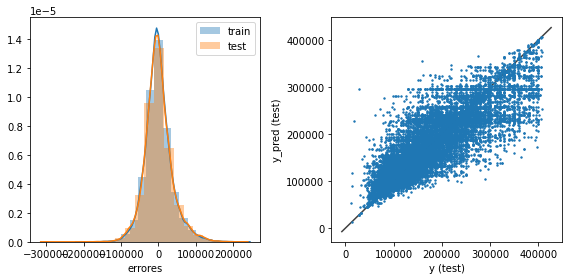

In [47]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_2, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_2, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_predict, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

#### Optimizacion de hiperparametros

In [48]:
X = df_reg.drop("price", axis=1)
y = df_reg['price']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Instanciamos la regresion y transformamos las columnas necesarias dejando por fuera las dumificadas

In [50]:
reg = LinearRegression()

columns=["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]
transformer= make_column_transformer((PolynomialFeatures(include_bias=False), columns),remainder= 'passthrough')

X_train_poly = transformer.fit_transform(X_train)
X_test_poly = transformer.transform(X_test)
reg.fit(X_train_poly, y_train)

LinearRegression()

Hacemos una validacion cruzada

In [51]:
best_score_train = abs(cross_val_score(
    reg, X_train_poly, y_train, cv=5, scoring="neg_root_mean_squared_error")
)
best_score_test = abs(cross_val_score(
    reg, X_test_poly, y_test, cv=5,  scoring="neg_root_mean_squared_error"))
print("Best Score en Train (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_train.mean(), best_score_train.std()))
print("Best Score en Test (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_test.mean(), best_score_test.std()))

Best Score en Train (CV = 5) 38103.30 (+/- 337.57)
Best Score en Test (CV = 5) 38343.70 (+/- 898.20)


Ahora pasamos a hacer un grid search para ver que grado de polinomio es el mejor para nuestro modelo

In [52]:
pipeline_poly = make_pipeline(transformer, reg)
param_grid = {'columntransformer__polynomialfeatures__degree': [1, 2, 3, 4, 5, 6]}
model = GridSearchCV(pipeline_poly,
                     param_grid,
                     scoring='neg_root_mean_squared_error',
                     cv=5)

In [53]:
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('polynomialfeatures',
                                                                         PolynomialFeatures(include_bias=False),
                                                                         ['rooms',
                                                                          'bedrooms',
                                                                          'bathrooms',
                                                                          'surface_total',
                                                                          'surface_covered'])])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'columntransformer__polynomialfeatur

In [54]:
model.best_params_

{'columntransformer__polynomialfeatures__degree': 4}

In [55]:
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.132071,0.004773,0.008047,0.003114,1,{'columntransformer__polynomialfeatures__degre...,-39009.826438,-39520.857558,-39064.599285,-38795.856857,-39400.957987,-39158.419625,265.525917,5
1,0.168334,0.011116,0.016714,0.003771,2,{'columntransformer__polynomialfeatures__degre...,-37888.534604,-38622.626734,-38032.162917,-37653.693295,-38319.476115,-38103.298733,337.568724,3
2,0.253874,0.011370,0.016929,0.004855,3,{'columntransformer__polynomialfeatures__degre...,-37758.703900,-38418.897969,-37768.400369,-37380.411850,-38059.149811,-37877.112780,346.184788,2
3,0.430680,0.018886,0.033018,0.004305,4,{'columntransformer__polynomialfeatures__degre...,-37626.964241,-38229.065630,-37981.362712,-37317.754530,-37915.187515,-37814.066926,313.614600,1
4,0.839420,0.056773,0.052339,0.003993,5,{'columntransformer__polynomialfeatures__degre...,-38913.870569,-38934.319607,-40255.929354,-38063.348434,-38263.985239,-38886.290640,767.264691,4
5,1.687118,0.020095,0.096628,0.007344,6,{'columntransformer__polynomialfeatures__degre...,-54197.711844,-43919.917794,-105258.010475,-53546.752625,-46981.243473,-60780.727242,22577.014204,6


#### Regularizacion

Instanciamos nuevamente la regresion pero ahora cambiamos el grado a 4 sabiendo que este es el mejor ya que fue el resultado de nuestro grid search

In [56]:
reg = LinearRegression()

columns=["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]
transformer_2= make_column_transformer((PolynomialFeatures(degree = 4, include_bias=False), columns),remainder= 'passthrough')


X_train_poly_2 = transformer_2.fit_transform(X_train)
X_test_poly_2 = transformer_2.transform(X_test)

reg.fit(X_train_poly_2, y_train)

LinearRegression()

In [57]:
y_train_pred_8 = reg.predict(X_train_poly_2)
y_test_pred_8 = reg.predict(X_test_poly_2)

rmse_train_9 = np.sqrt(mean_squared_error(y_train, y_train_pred_8))
rmse_test_9 = np.sqrt(mean_squared_error(y_test, y_test_pred_8))

print(f'Raíz del error cuadrático medio en Train: {rmse_train_2}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_2}')

Raíz del error cuadrático medio en Train: 36051.367854333774
Raíz del error cuadrático medio en Test: 36744.777099451116


In [58]:
warnings.filterwarnings("ignore")

reg_ridge2 = Ridge(alpha= 5.0)
reg_ridge2.fit(X_train_poly_2,y_train)
y_train_pred_2 = reg_ridge2.predict(X_train_poly_2)
y_test_pred_2 = reg_ridge2.predict(X_test_poly_2)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [    0.          1183.34871728  9918.60411099 ...  1460.6807035
     0.         -7652.64610352]
Ordenada: -38405.31843984299


In [59]:
rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2))

print(f'El RMSE del train es: {rmse_train_2}')
print(f'El RMSE del test es: {rmse_test_2}')

El RMSE del train es: 37490.74852357312
El RMSE del test es: 37974.33212229281


Como podemos observar, al generalizar el modelo usando la regularizacion, tuvimos un pequeño costo en terminos de error, pero a su vez notamos una reduccion del overfitting

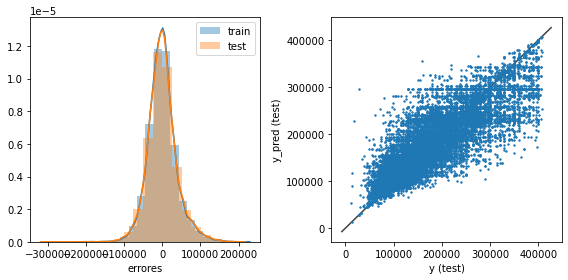

In [60]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_2, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_2, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_predict, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

## Random forest


In [61]:
df_rf = df_encoded.copy()
df_rf = df_encoded.drop(['l3','title','description', 'property_type'], axis=1)
df_rf.head()

,rooms,bedrooms,price,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,Abasto,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,2.0,1.0,159000.0,2.0,70.0,58.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,125000.0,1.0,45.0,45.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,295000.0,1.0,85.0,50.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1.0,150000.0,1.0,56.0,56.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,159500.0,1.0,70.0,70.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X = df_rf.drop("price", axis=1)
y = df_rf['price']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [64]:
scaler = StandardScaler() 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
reg = RandomForestRegressor(random_state = 42)
reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [66]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('El RMSE del train es: ',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('El RMSE del test es: ',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

El RMSE del train es:  15638.807801327417
El RMSE del test es:  28857.121264170855


In [95]:
rf = RandomForestRegressor()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 23, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 52.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 93.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 3, 5, 7, 9, 12, 14, 16,
                                                      18, 20, 23, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [0, 111, 222, 333, 444,
                                                         555, 666, 777, 888,
                                                         1000]},
                   random_state=42, verbose=2)

In [96]:
y_train_pred_1 = rf_random.predict(X_train)
y_test_pred_1 = rf_random.predict(X_test)
print('El RMSE del train es: ',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_1)))
print('El RMSE del test es: ',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_1)))

El RMSE del train es:  18819.679767998467
El RMSE del test es:  28526.24062292762


In [97]:
rf_random.best_params_

{'n_estimators': 444,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

Entrenamos con el modelo optimizado

In [101]:
rf2 = RandomForestRegressor(n_estimators = 777, min_samples_split = 10, min_samples_leaf = 1,
                           max_features = 'sqrt', max_depth = None, bootstrap = True)

In [102]:
rf2.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=10,
                      n_estimators=777)

In [103]:
y_train_pred_2 = rf2.predict(X_train)
y_test_pred_2 = rf2.predict(X_test)
print('El RMSE del train es: ',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_2)))
print('El RMSE del test es: ',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_2)))

El RMSE del train es:  22024.045471822665
El RMSE del test es:  29201.87183331657


### Comparacion de los modelos avanzados con el del punto A

In [104]:
resultados_dic = {'Modelo': ['Proyecto 1','Proyecto 1','Filtrado','Filtrado', 'Reg poly', 'Reg poly', 'Rand Forest', 'Rand Forest'],
                  'Error':['95844', '98510', rmse_train_tree_all, rmse_test_tree_all, '37490', '37974', '22024', '29201'],
                  'Datos': ['train', 'test', 'train', 'test','train', 'test', 'train', 'test']
                 } 

Resultados = pd.DataFrame(resultados_dic)
Resultados

,Modelo,Error,Datos
0,Proyecto 1,95844,train
1,Proyecto 1,98510,test
2,Filtrado,39757.8,train
3,Filtrado,39651.3,test
4,Reg poly,37490,train
5,Reg poly,37974,test
6,Rand Forest,22024,train
7,Rand Forest,29201,test


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

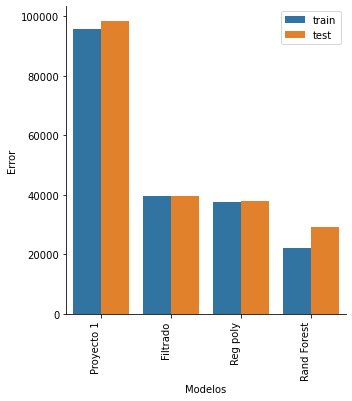

In [105]:
sns.catplot(x = 'Modelo', y = 'Error', hue = 'Datos', kind = 'bar', data = Resultados, legend = False)
plt.xlabel('Modelos')
plt.ylabel('Error')
plt.legend(loc='upper right')
plt.xticks(rotation=90, horizontalalignment='right')

Podemos observar en el grafico anterior como va mejorando (disminuyendo) el error a medida que voy usando herrmaientas y modelos mas avanzados. El filtrado de los datos de la parte A ayudo en gran medida a la prediccion por lo que creo que es de suma importancia el tratamiento previo. Analizando los modelos, si bien podemos ver una mejoria progresiva a medida que los modelos son mas avanzados, en este caso en particular, teniendo en cuenta que para los de la parte B tienen incluidas las variables dumificadas, por simpleza me quedaria con el de la parte A. Esta decision la tomo ya que la complejidad no solo para armar los modelos sino para ejecutarlos y sobre todo optimizarlos por grid search o random search fue muy costoso en terminos de tiempo y la mejora no fue tan significativa.

Observacion: intente de diferentes maneras optimizar el random forest y este fue el mejor resultado que pude obtener sabiendo que esta overfitteado.

# PARTE C - Interpretación de modelos

#### Importancia de variables en la regresion lineal con atributos polinomicos

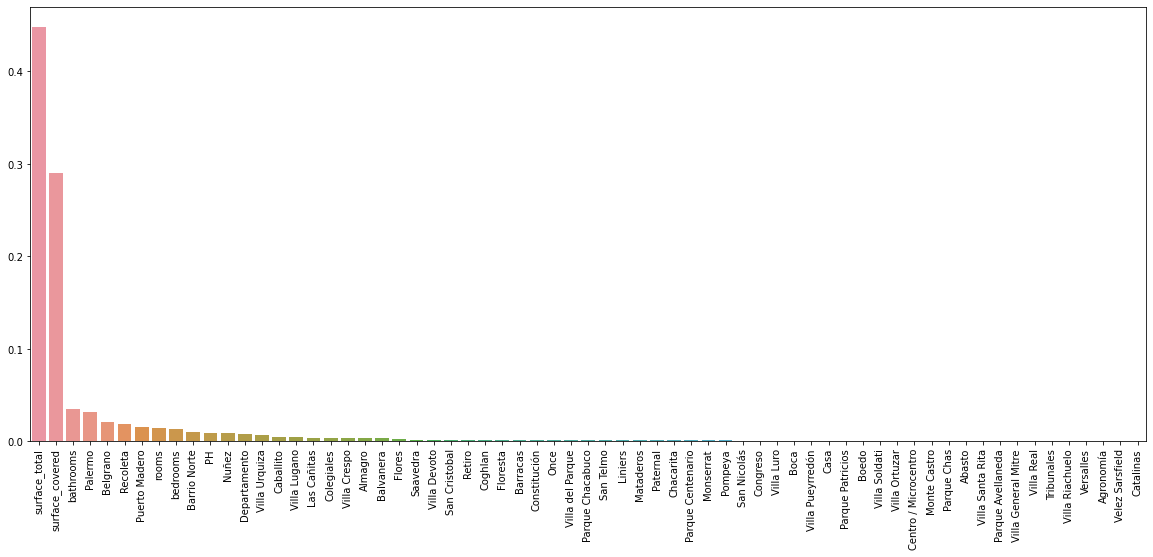

In [106]:
importances = reg.feature_importances_
columns = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (20,8))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

#### Importancia de variables en el Random Forest

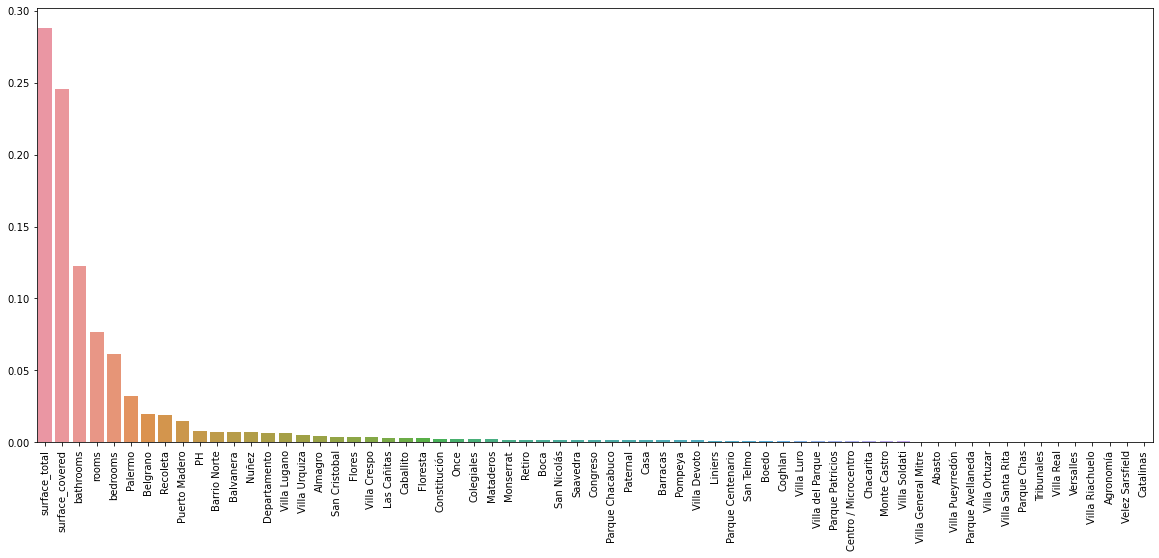

In [107]:
importances = rf2.feature_importances_
columns = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (20,8))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

Se puede observar claramente la gran importancia de la superficie tanto cubierta como total en las predicciones y la poca incidencia de las variables dummificadas que yo las agregue con el criterio de una minima mejora en el modelo que supuse que cuando optimizara se mejoraria pero no fue asi. Como conclusion podria destacar el poder del analisis y tratamiento de datos previos ya que fue lo que dio una mejora notoria en terminos de error.

Con respecto a la distribucion de los errores, realice el grafico al final de cada modelo y todos tienden a la normal pero cuando analizamos el grafico de predichos en todas podemos observar al final del lado derecho  como el patron se "rompe" y se dispersan mas los datos. Esto puede ser indicio que nuestro modelo es bueno para predecir entre un rango de precios medio y medio bajo pero no tanto para precios altos.